In [1]:
import numpy as np
import pandas as pd

from util.directed_graph import DirectedGraph
from util.read_pairs_data import read_pairs_data
from util.graph_vis import GraphVisualization
from greedy_n_way_exchange import GreedyNWayExchange

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pairs_filename = "../data/100/100_0_pairs.txt"

In [3]:
pairs = read_pairs_data(pairs_filename)
pairs.head()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,0,A,O,90
1,1,B,-,-1
2,2,A,O,90
3,3,A,A,92
4,4,A,B,5


In [4]:
pairs.tail()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
95,95,A,-,-1
96,96,B,O,5
97,97,B,O,5
98,98,AB,A,32
99,99,AB,A,5


In [5]:
grph = DirectedGraph(pairs.head(20))

In [6]:
grph.adjacency

{0: [3, 5, 11, 15, 17],
 1: [4, 19],
 2: [3, 5, 11, 15, 17],
 3: [5, 11, 15, 17],
 4: [3, 5, 11, 15, 17],
 5: [4, 19],
 6: [4, 19],
 7: [4, 19],
 8: [3, 5, 11, 15, 17],
 9: [3, 5, 11, 15, 17],
 10: [3, 5, 11, 15, 17],
 11: [4, 19],
 12: [3, 5, 11, 15, 17],
 13: [4, 19],
 14: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19],
 15: [3, 5, 11, 17],
 16: [3, 5, 11, 15, 17],
 17: [4, 19],
 18: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19],
 19: [3, 5, 11, 15, 17]}

In [7]:
edges = []

for donor_idx in grph.adjacency:
    for recipient_idx in grph.adjacency[donor_idx]:
        edges.append([donor_idx, recipient_idx])

In [8]:
gv = GraphVisualization()

for from_, to_ in edges[:15]:
    gv.add_edge(from_, to_)

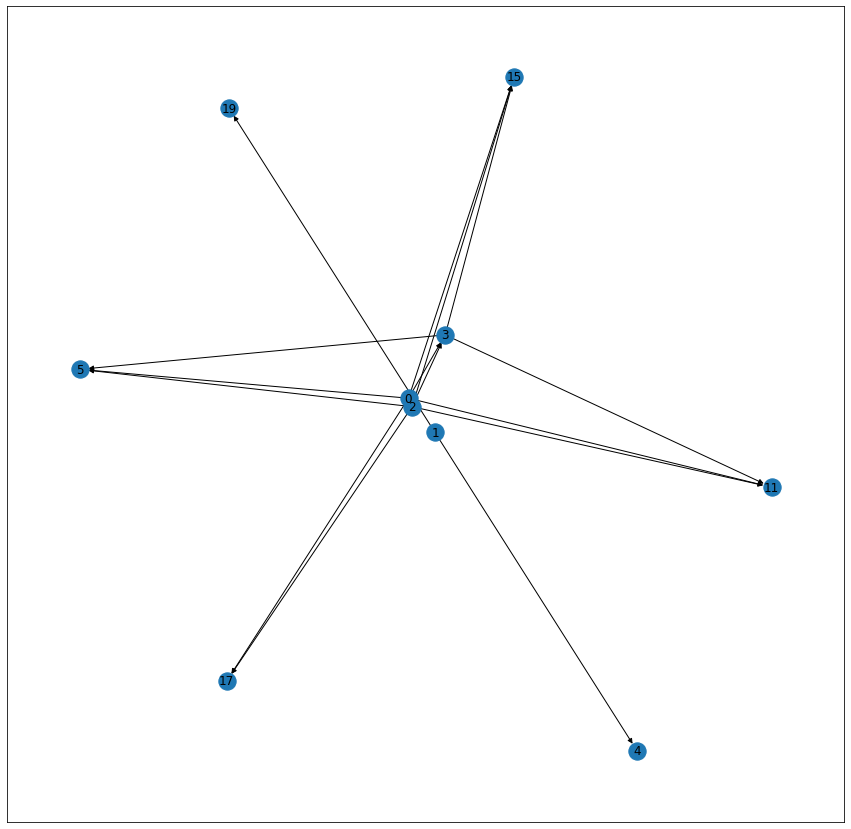

In [9]:
plt.figure(figsize=(15, 15))
gv.visualize()

In [10]:
cycles = grph.get_cycles()

In [11]:
cycles

[[3, 5, 4],
 [3, 5, 4, 11, 19],
 [3, 5, 4, 11, 19, 15],
 [3, 5, 4, 15],
 [3, 5, 4, 15, 11, 19],
 [3, 5, 4, 15, 17, 19],
 [3, 5, 4, 17, 19],
 [3, 5, 4, 17, 19, 15],
 [3, 5, 19],
 [3, 5, 19, 11, 4],
 [3, 5, 19, 11, 4, 15],
 [3, 5, 19, 15],
 [3, 5, 19, 15, 11, 4],
 [3, 5, 19, 15, 17, 4],
 [3, 5, 19, 17, 4],
 [3, 5, 19, 17, 4, 15],
 [3, 11, 4],
 [3, 11, 4, 5, 19],
 [3, 11, 4, 5, 19, 15],
 [3, 11, 4, 15],
 [3, 11, 4, 15, 5, 19],
 [3, 11, 4, 15, 17, 19],
 [3, 11, 4, 17, 19],
 [3, 11, 4, 17, 19, 15],
 [3, 11, 19],
 [3, 11, 19, 5, 4],
 [3, 11, 19, 5, 4, 15],
 [3, 11, 19, 15],
 [3, 11, 19, 15, 5, 4],
 [3, 11, 19, 15, 17, 4],
 [3, 11, 19, 17, 4],
 [3, 11, 19, 17, 4, 15],
 [3, 15],
 [3, 15, 5, 4],
 [3, 15, 5, 4, 11, 19],
 [3, 15, 5, 4, 17, 19],
 [3, 15, 5, 19],
 [3, 15, 5, 19, 11, 4],
 [3, 15, 5, 19, 17, 4],
 [3, 15, 11, 4],
 [3, 15, 11, 4, 5, 19],
 [3, 15, 11, 4, 17, 19],
 [3, 15, 11, 19],
 [3, 15, 11, 19, 5, 4],
 [3, 15, 11, 19, 17, 4],
 [3, 15, 17, 4],
 [3, 15, 17, 4, 5, 19],
 [3, 15, 17, 4, 1

In [12]:
gnway = GreedyNWayExchange(10, 'maximum')

In [13]:
gnway.finalize_exchange(grph)

In [14]:
gnway.show_donation_mapping('text')

3 --> 5 --> 4
11 --> 19
14 --> 18


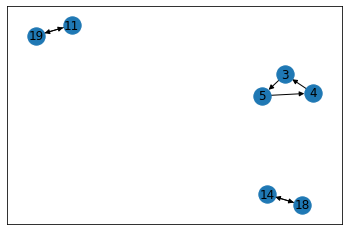

In [15]:
gnway.show_donation_mapping('graph')